In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('file/stroke.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='gender', ylabel='stroke'>

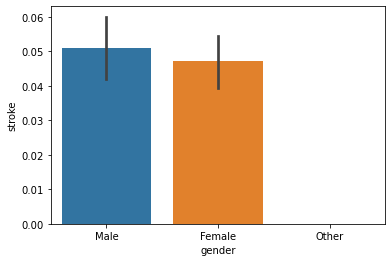

In [6]:
sns.barplot(x = data['gender'], y = data['stroke'])

<AxesSubplot:xlabel='age', ylabel='stroke'>

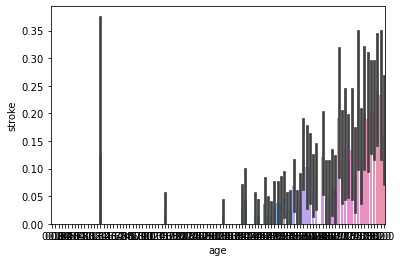

In [7]:
sns.barplot(x = data['age'], y = data['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

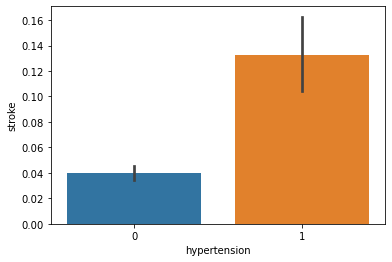

In [8]:
sns.barplot(x = data['hypertension'], y = data['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

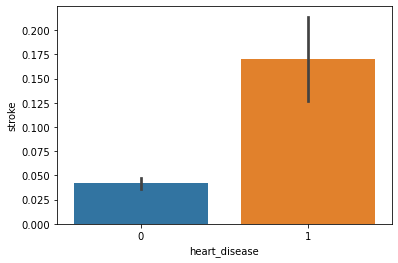

In [9]:
sns.barplot(x = data['heart_disease'], y = data['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

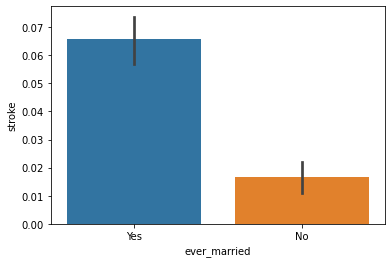

In [10]:
sns.barplot(x = data['ever_married'], y = data['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

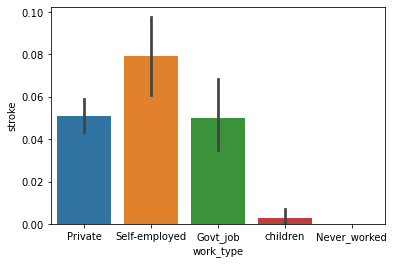

In [10]:
sns.barplot(x = data['work_type'], y = data['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

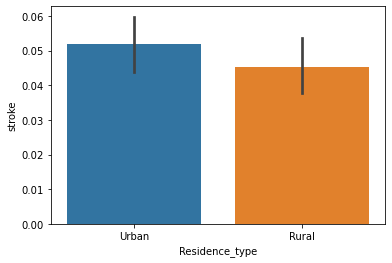

In [11]:
sns.barplot(x = data['Residence_type'], y = data['stroke'])

<AxesSubplot:xlabel='bmi', ylabel='stroke'>

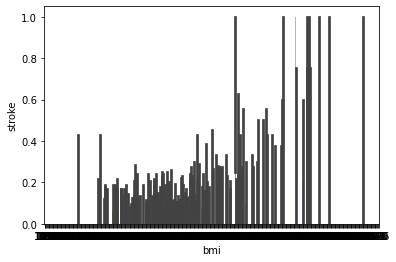

In [12]:
sns.barplot(x = data['bmi'], y = data['stroke'])

In [13]:
data.drop(['id'], axis=1, inplace=True)

In [14]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})
data['work_type'] = data['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,1.0,61.0,0,0,1,1,0,202.21,NaN,0,1
2,0.0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,1.0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1.0,79.0,1,0,1,1,0,174.12,24.0,0,1


In [16]:
data.dropna(axis = 0, inplace=True)
data.head(1000)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.00,0,1,1,0,1,228.69,36.6,1,1
2,0.0,80.00,0,1,1,0,0,105.92,32.5,0,1
3,1.0,49.00,0,0,1,0,1,171.23,34.4,2,1
4,1.0,79.00,1,0,1,1,0,174.12,24.0,0,1
5,0.0,81.00,0,0,1,0,1,186.21,29.0,1,1
6,0.0,74.00,1,1,1,0,0,70.09,27.4,0,1
7,1.0,69.00,0,0,0,0,1,94.39,22.8,0,1
9,1.0,78.00,0,0,1,0,1,58.57,24.2,3,1
10,1.0,81.00,1,0,1,0,0,80.43,29.7,0,1
11,1.0,61.00,0,1,1,2,0,120.46,36.8,2,1


In [17]:
train, test = train_test_split(data, test_size = 0.2, random_state=2019)

x_train = train.drop(['stroke'], axis=1)
y_train = train.stroke

x_test = test.drop(['stroke'], axis=1)
y_test = test.stroke

In [22]:
model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('SVM: %.2f' %(metrics.accuracy_score(y_pred, y_test) * 100))

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('DecisionTreeClassifier: %.2f' %(metrics.accuracy_score(y_pred, y_test) * 100))

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('KNeighborsClassifier: %.2f' %(metrics.accuracy_score(y_pred, y_test) * 100))

model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('LogisticRegression: %.2f' %(metrics.accuracy_score(y_pred, y_test) * 100))

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('RandomForestClassifier: %.2f' %(metrics.accuracy_score(y_pred, y_test) * 100))

SVM: 95.62
DecisionTreeClassifier: 92.77
KNeighborsClassifier: 94.91
LogisticRegression: 95.62
RandomForestClassifier: 95.52
